Import packages and modules

In [1]:
#Import packages

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston

Load the Boston Housing Dataset

In [2]:
features, prices = load_boston(return_X_y = True)

Define Hyperparameters & Data Info

In [3]:
learning_rate = 0.001
epochs = 20000

Data Preparation

In [4]:
#Training samples
#Scale is used to convert data into zero mean and unit std dev
train_features = tf.cast(scale(features[ : 350]), dtype = tf.float32)
train_prices = prices[ : 350]

#Validation samples
#Scale is used to convert data into zero mean and unit std dev
valid_features = tf.cast(scale(features[350 : 450]), dtype = tf.float32)
valid_prices = prices[350 : 450]

#Testing samples
#Scale is used to convert data into zero mean and unit std dev
test_features = tf.cast(scale(features[450 : ]), dtype = tf.float32)
test_prices = prices[450 : ]

Forward pass of the model

In [5]:
#Function to make a forward passs
def forward_pass(x, weights, bias):
    return tf.add(tf.matmul(x, weights), bias)

Define the cost function

In [6]:
#Cost function definition - R-MSE
def loss(x, y, weights, bias):
    
    #Calculate Loss and R-MSE
    squared_error = tf.square(forward_pass(x, weights, bias) - y )
    return tf.sqrt(tf.reduce_mean(squared_error))

Put it all together

In [7]:
# Find the derivative of loss with respect to weight and bias
def gradient(x, y, weights, bias):
    
    with tf.GradientTape() as tape:
        loss_value = loss(x, y, weights, bias)
    return tape.gradient(loss_value, [weights, bias])# direction and value ofthe gradient of our weight and bias

Initialize the Weights and Bias

In [8]:
#Initialize W and B for the network
W = tf.Variable(tf.random.normal([13, 1], mean = 1.0, stddev = 1.0, dtype = tf.float32))
B = tf.Variable(tf.zeros(1) , dtype = tf.float32)
#print(W,B)
print("Initial loss: {}".format(loss(train_features, train_prices, W, B)))

Initial loss: 26.92583465576172


Training Loop

In [9]:
l = []
a = []
for i in range(epochs+1): #iterate for each training epoch
    
    #Calculate gradients
    deltaW, deltaB = gradient(train_features, train_prices, W, B) 
    
    #Wieght update and bias update
    change_W = deltaW * learning_rate 
    change_B = deltaB * learning_rate 
    
    #Make changes to the values according to the gradients and learning rate
    W.assign_sub(change_W) # subract from W
    B.assign_sub(change_B) # subract from B
    
    #Printing loss information
    if i % 1000 == 0:
        l.append(loss(train_features, valid_prices, W, B))
        print("Validation Loss after Epoch {}: {}".format(i, loss(valid_features, valid_prices, W, B)))

Validation Loss after Epoch 0: 19.271181106567383
Validation Loss after Epoch 1000: 18.365365982055664
Validation Loss after Epoch 2000: 17.50364875793457
Validation Loss after Epoch 3000: 16.682329177856445
Validation Loss after Epoch 4000: 15.899077415466309
Validation Loss after Epoch 5000: 15.152819633483887
Validation Loss after Epoch 6000: 14.44364070892334
Validation Loss after Epoch 7000: 13.772659301757812
Validation Loss after Epoch 8000: 13.141918182373047
Validation Loss after Epoch 9000: 12.554231643676758
Validation Loss after Epoch 10000: 12.013050079345703
Validation Loss after Epoch 11000: 11.522195816040039
Validation Loss after Epoch 12000: 11.085672378540039
Validation Loss after Epoch 13000: 10.707282066345215
Validation Loss after Epoch 14000: 10.390276908874512
Validation Loss after Epoch 15000: 10.136938095092773
Validation Loss after Epoch 16000: 9.948180198669434
Validation Loss after Epoch 17000: 9.823258399963379
Validation Loss after Epoch 18000: 9.75960159

Plot Loss Graphs

[]

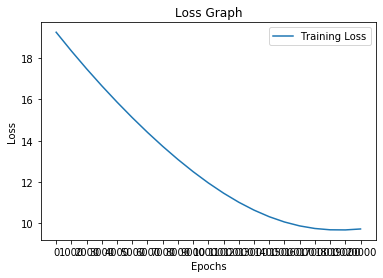

In [10]:
iterations = np.arange(0, 20001, 1000)
plt.plot(iterations, l, label = 'Training Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20001, 1000))
plt.ylabel('Loss')
plt.legend()
plt.plot()

Real time predictions

In [11]:
def predictions(index):
    '''
    
    '''

    example_house = index
    y = test_prices[example_house]
    y_pred = forward_pass(test_features,W.numpy(),B.numpy())[example_house]
    print('Actual median house value is {} (in $10k)'.format(y))
    print('Predicted median house value is {} (in $10k)'.format(y_pred))

In [12]:
predictions(20)

Actual median house value is 19.9 (in $10k)
Predicted median house value is [18.767366] (in $10k)


In [13]:
predictions(35)

Actual median house value is 21.2 (in $10k)
Predicted median house value is [19.115408] (in $10k)
